In [1]:
#import numpy as np
import xarray as xr
import cartopy as cr
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt

In [2]:
off= pd.read_csv('datalog3.csv',names=['Datetime','Temperature','Humidity','Pressure','Altitude','CO','CO$_2$','NH$_3$','PM$_{1}$','PM$_{2.5}$','PM$_{10}$'], delimiter= ',' ,skiprows= 4122, nrows=9094)

In [3]:
off

,Datetime,Temperature,Humidity,Pressure,Altitude,CO,CO$_2$,NH$_3$,PM$_{1}$,PM$_{2.5}$,PM$_{10}$
0,2023-6-15 0:0:15,27.86,47.47,98465.03,240.88,0.78,400.87,1.56,20.0,28.0,28.0
1,2023-6-15 0:0:24,27.86,47.42,98465.22,240.86,0.84,400.92,1.64,21.0,29.0,31.0
2,2023-6-15 0:0:34,27.87,47.37,98465.42,240.85,0.82,400.91,1.61,20.0,29.0,30.0
3,2023-6-15 0:0:43,27.89,47.35,98465.23,240.86,0.83,400.92,1.63,20.0,27.0,28.0
4,2023-6-15 0:0:53,27.89,47.35,98465.81,240.81,1.42,401.35,2.28,20.0,29.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...
9089,2023-6-15 23:59:21,28.08,44.23,98445.94,242.51,0.88,400.95,1.68,10.0,16.0,16.0
9090,2023-6-15 23:59:30,28.05,44.31,98447.35,242.39,1.12,401.14,1.96,10.0,16.0,17.0
9091,2023-6-15 23:59:40,28.06,44.37,98447.50,242.37,0.87,400.95,1.68,9.0,14.0,16.0
9092,2023-6-15 23:59:49,28.05,44.44,98447.45,242.38,1.37,401.32,2.23,11.0,16.0,18.0


In [4]:
learn=off.set_index('Datetime')

In [5]:
# learn=lc.loc['2023-06-15 0:0:5':'2023-6-16 0:0:8']
# learn

In [6]:
learn['Hours']= pd.to_datetime(learn.index)
learn=learn.groupby(learn.Hours.map(lambda t: t.hour)).mean()
hours=[str(i)+" "+"hr" for i in range(1, len(learn)+1,1)]

In [7]:
learn

,Temperature,Humidity,Pressure,Altitude,CO,CO$_2$,NH$_3$,PM$_{1}$,PM$_{2.5}$,PM$_{10}$
Hours,,,,,,,,,,
0,27.772037,46.815397,98456.389921,241.616587,0.971878,401.021720,1.782804,16.383598,23.431217,24.201058
1,27.622876,46.993325,98414.926544,245.150449,0.957678,401.011451,1.767625,12.765172,18.124011,18.612137
2,27.648338,46.866069,98391.558865,247.142665,0.962744,401.015541,1.773061,9.601583,13.744063,14.131926
3,27.521821,46.862005,98396.438391,246.726649,0.983087,401.030449,1.795910,8.554090,12.253298,12.654354
4,27.583747,47.087018,98402.791636,246.184776,0.962111,401.014485,1.772269,8.493404,12.271768,12.678100
5,27.459288,47.641583,98429.570580,243.902348,0.888338,400.957573,1.685910,9.556728,13.517150,14.089710
6,27.381372,47.340185,98541.018892,234.407520,0.899710,400.966253,1.698628,11.416887,16.554090,17.176781
7,27.462665,47.205040,98597.306728,229.615303,0.898285,400.964776,1.696491,15.408971,22.556728,23.327177
8,27.461349,47.123201,98639.890635,225.991296,0.863360,400.936931,1.653836,14.185185,21.777778,23.576720


In [8]:
L_coms=(learn[['CO','CO$_2$','NH$_3$','PM$_{1}$','PM$_{2.5}$','PM$_{10}$']])
L_coms

,CO,CO$_2$,NH$_3$,PM$_{1}$,PM$_{2.5}$,PM$_{10}$
Hours,,,,,,
0,0.971878,401.021720,1.782804,16.383598,23.431217,24.201058
1,0.957678,401.011451,1.767625,12.765172,18.124011,18.612137
2,0.962744,401.015541,1.773061,9.601583,13.744063,14.131926
3,0.983087,401.030449,1.795910,8.554090,12.253298,12.654354
4,0.962111,401.014485,1.772269,8.493404,12.271768,12.678100
5,0.888338,400.957573,1.685910,9.556728,13.517150,14.089710
6,0.899710,400.966253,1.698628,11.416887,16.554090,17.176781
7,0.898285,400.964776,1.696491,15.408971,22.556728,23.327177
8,0.863360,400.936931,1.653836,14.185185,21.777778,23.576720


<Axes:xlabel='Hours'>

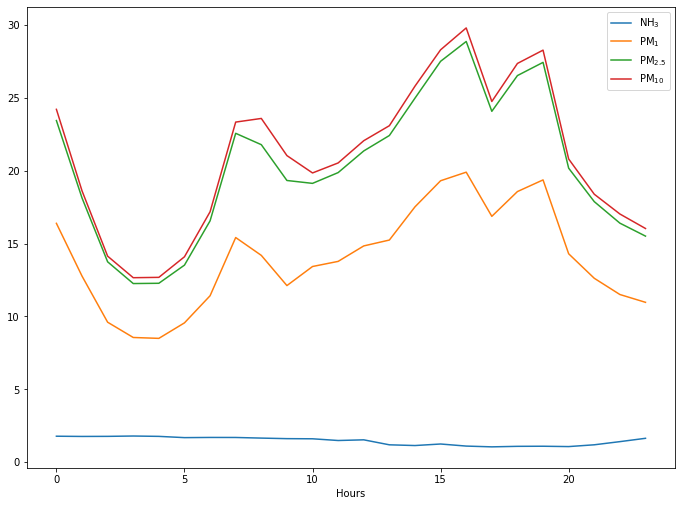

In [9]:
fig=plt.figure(figsize=(10,8))
L_coms.plot( y=['NH$_3$','PM$_{1}$','PM$_{2.5}$','PM$_{10}$'], ax = fig.add_axes([0,0,0.9,0.8]) )

Text(0, 0.5, 'PM$_{10}$')

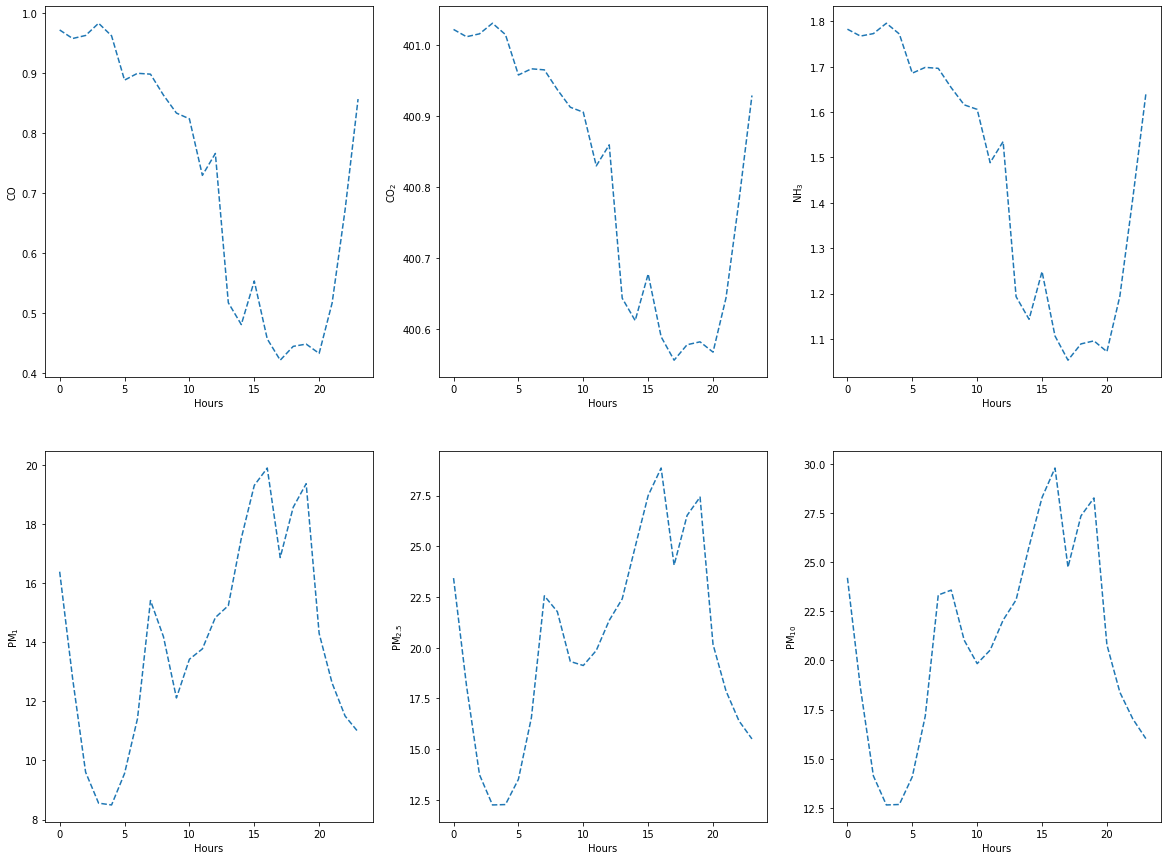

In [10]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,15))

# fig, axes= plt.subplots(ncols=3, nrows=2)

#columns=list(desmond.columns)

axes[0,0].plot(L_coms.index,L_coms.CO, ls='--')
axes[0,0].set_xlabel('Hours')
axes[0,0].set_ylabel(L_coms.columns[0])

    
axes[0,1].plot(L_coms.index,L_coms['CO$_2$'], ls='--')
axes[0,1].set_xlabel('Hours')
axes[0,1].set_ylabel(L_coms.columns[1])


axes[0,2].plot(L_coms.index,L_coms['NH$_3$'], ls='--')
axes[0,2].set_xlabel('Hours')
axes[0,2].set_ylabel(L_coms.columns[2])


axes[1,0].plot(L_coms.index,L_coms['PM$_{1}$'], ls='--')
axes[1,0].set_xlabel('Hours')
axes[1,0].set_ylabel(L_coms.columns[3])


axes[1,1].plot(L_coms.index,L_coms['PM$_{2.5}$'], ls='--')
axes[1,1].set_xlabel('Hours')
axes[1,1].set_ylabel(L_coms.columns[4])


axes[1,2].plot(L_coms.index,L_coms['PM$_{10}$'], ls='--')
axes[1,2].set_xlabel('Hours')
axes[1,2].set_ylabel(L_coms.columns[5])


In [11]:
# hrs= ('9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00')
hrs = ['01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00','24:00']

In [12]:
L_coms.insert(1,'Hourss',hrs)

In [13]:
L_coms

,CO,Hourss,CO$_2$,NH$_3$,PM$_{1}$,PM$_{2.5}$,PM$_{10}$
Hours,,,,,,,
0,0.971878,01:00,401.021720,1.782804,16.383598,23.431217,24.201058
1,0.957678,02:00,401.011451,1.767625,12.765172,18.124011,18.612137
2,0.962744,03:00,401.015541,1.773061,9.601583,13.744063,14.131926
3,0.983087,04:00,401.030449,1.795910,8.554090,12.253298,12.654354
4,0.962111,05:00,401.014485,1.772269,8.493404,12.271768,12.678100
5,0.888338,06:00,400.957573,1.685910,9.556728,13.517150,14.089710
6,0.899710,07:00,400.966253,1.698628,11.416887,16.554090,17.176781
7,0.898285,08:00,400.964776,1.696491,15.408971,22.556728,23.327177
8,0.863360,09:00,400.936931,1.653836,14.185185,21.777778,23.576720


Text(0, 0.5, 'Pollution levels [$\\mu g/m^3$ ]')

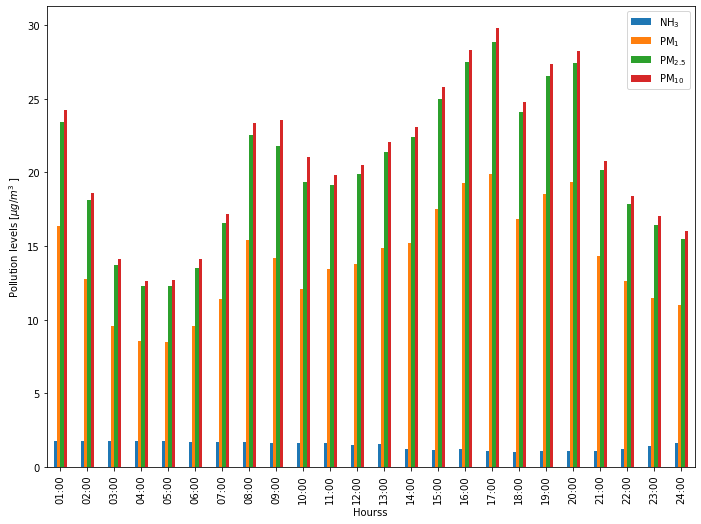

In [14]:
fig=plt.figure(figsize=(10,8))

L_coms.plot(x='Hourss', y=['NH$_3$','PM$_{1}$','PM$_{2.5}$','PM$_{10}$'],kind='bar', stacked=False ,ax = fig.add_axes([0,0,0.9,0.8]))
plt.ylabel('Pollution levels [$\mu g/m^3$ ]')


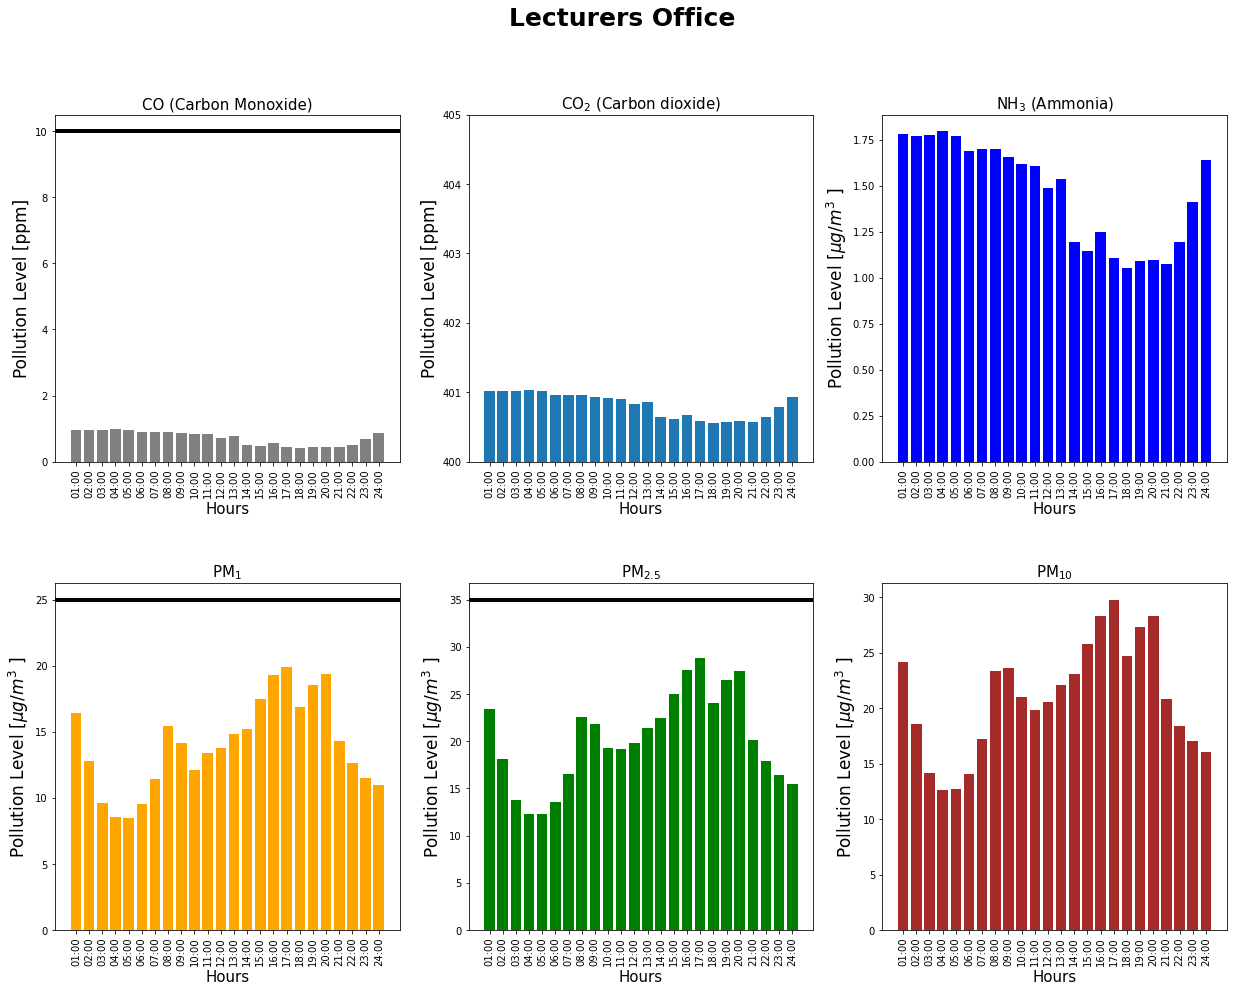

In [17]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(21,15))
plt.suptitle('Lecturers Office', fontsize = 25, fontweight = 'bold')
fig.subplots_adjust(wspace=0.2, hspace=0.35)
# fig, axes= plt.subplots(ncols=3, nrows=2)

#columns=list(desmond.columns)

axes[0,0].bar(L_coms.Hourss,L_coms.CO, color='gray')
axes[0,0].set_xlabel('Hours',fontsize=15)
axes[0,0].set_ylabel('Pollution Level [ppm]',fontsize=17)
axes[0,0].set_xticks(L_coms.Hourss)
axes[0,0].tick_params(axis='x', labelrotation = 90)
axes[0,0].set_title("CO (Carbon Monoxide)", fontsize=15)
axes[0,0].threshold = 10

    
axes[0,1].bar(L_coms.Hourss,L_coms['CO$_2$'])
axes[0,1].set_xlabel('Hours',fontsize=15)
axes[0,1].set_ylabel('Pollution Level [ppm]',fontsize=17)
axes[0,1].set_ylim(400, 405)
axes[0,1].set_xticks(L_coms.Hourss)
axes[0,1].tick_params(axis='x', labelrotation = 90)
axes[0,1].set_title("CO$_2$ (Carbon dioxide)", fontsize=15)
#axes[0,1].threshold = 403


axes[0,2].bar(L_coms.Hourss,L_coms['NH$_3$'], color='blue')
axes[0,2].set_xlabel('Hours',fontsize=15)
axes[0,2].set_ylabel('Pollution Level [$\mu g/m^3$ ]',fontsize=17)
axes[0,2].set_xticks(L_coms.Hourss)
axes[0,2].tick_params(axis='x', labelrotation = 90)
axes[0,2].set_title("NH$_3$ (Ammonia)", fontsize=15)
#axes[0,2].threshold = 3



axes[1,0].bar(L_coms.Hourss,L_coms['PM$_{1}$'],color='orange')
axes[1,0].set_xlabel('Hours',fontsize=15)
axes[1,0].set_ylabel('Pollution Level [$\mu g/m^3$ ]',fontsize=17)
axes[1,0].set_xticks(L_coms.Hourss)
axes[1,0].tick_params(axis='x', labelrotation = 90)
axes[1,0].set_title("PM$_{1}$", fontsize=15)
axes[1,0].threshold =25

axes[1,1].bar(L_coms.Hourss,L_coms['PM$_{2.5}$'], color='green')
axes[1,1].set_xlabel('Hours',fontsize=15)
axes[1,1].set_ylabel('Pollution Level [$\mu g/m^3$ ]',fontsize=17)
axes[1,1].set_xticks(L_coms.Hourss)
axes[1,1].tick_params(axis='x', labelrotation = 90)
axes[1,1].set_title("PM$_{2.5}$", fontsize=15)
axes[1,1].threshold = 10

axes[1,2].bar(L_coms.Hourss,L_coms['PM$_{10}$'], color='brown')
axes[1,2].set_xlabel('Hours',fontsize=15)
axes[1,2].set_ylabel('Pollution Level [$\mu g/m^3$ ]',fontsize=17)
axes[1,2].set_xticks(L_coms.Hourss)
axes[1,2].tick_params(axis='x', labelrotation = 90)
axes[1,2].set_title("PM$_{10}$ ", fontsize=15)
axes[1,2].threshold =75

axes[0,0].axhline(y=10, color='black',lw=4)
#axes[0,1].axhline(y=1000, color='black')
#axes[0,2].axhline(y=25, color='black')
axes[1,0].axhline(y=25, color='black', lw= 4)
axes[1,1].axhline(y=35, color='black', lw=4)
#axes[1,2].axhline(y=75, color='black',lw=4)

plt.savefig("Dr. Jeff's Office.png")

#fig.tight_layout()  # Helps fit the plots well without overlapping each other
